In [1]:
import moviepy.editor as mpe
from glob import glob
import sys, os
import numpy as np
import scipy
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import decomposition

In [2]:
TOL = 1.0e-8
video = mpe.VideoFileClip("video.mp4")
video.subclip(0,50).ipython_display(width=300)

100%|█████████▉| 350/351 [00:00<00:00, 785.83it/s]


In [3]:
video.duration

50.0

In [4]:
def create_data_matrix_from_video(clip, k=5, scale=50):
    return np.vstack([scipy.misc.imresize(rgb2gray(clip.get_frame(i/float(k))).astype(int), 
                      scale).flatten() for i in range(k * int(clip.duration))]).T
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def plt_images(M, A, E, index_array, dims, filename=None):
    f = plt.figure(figsize=(15, 10))
    r = len(index_array)
    pics = r * 3
    for k, i in enumerate(index_array):
        for j, mat in enumerate([M, A, E]):
            sp = f.add_subplot(r, 3, 3*k + j + 1)
            sp.axis('Off')
            pixels = mat[:,i]
            if isinstance(pixels, scipy.sparse.csr_matrix):
                pixels = pixels.todense()
            plt.imshow(np.reshape(pixels, dims), cmap='gray')
    return f
def plots(ims, dims, figsize=(15,20), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims)
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        plt.imshow(np.reshape(ims[i], dims), cmap="gray")

In [5]:
scale = 25   # Adjust scale to change resolution of image
dims = (int(240 * (scale/100)), int(320 * (scale/100)))

In [6]:
M = create_data_matrix_from_video(video, 100, scale)

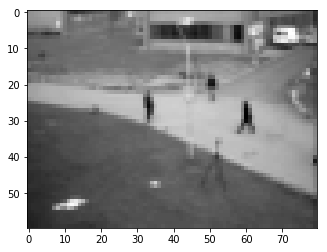

In [7]:
plt.imshow(np.reshape(M[:,140], dims), cmap='gray');

In [8]:
np.save("low_res_surveillance_matrix.npy", M)

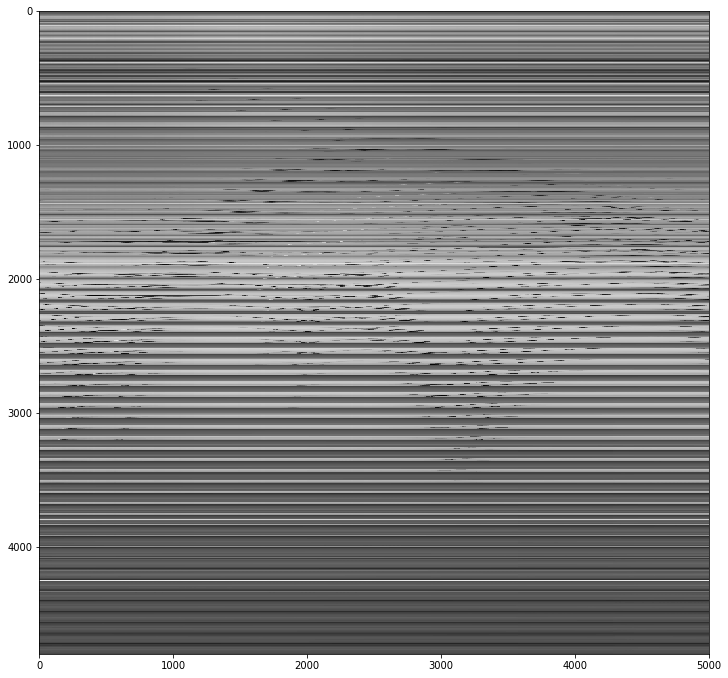

In [9]:
plt.figure(figsize=(12, 12))
plt.imshow(M, cmap='gray')

In [10]:
u, s, v = decomposition.randomized_svd(M, 2)

In [11]:
u.shape, s.shape, v.shape

((4800, 2), (2,), (2, 5000))

In [12]:
low_rank = u @ np.diag(s) @ v

In [13]:
low_rank.shape

(4800, 5000)

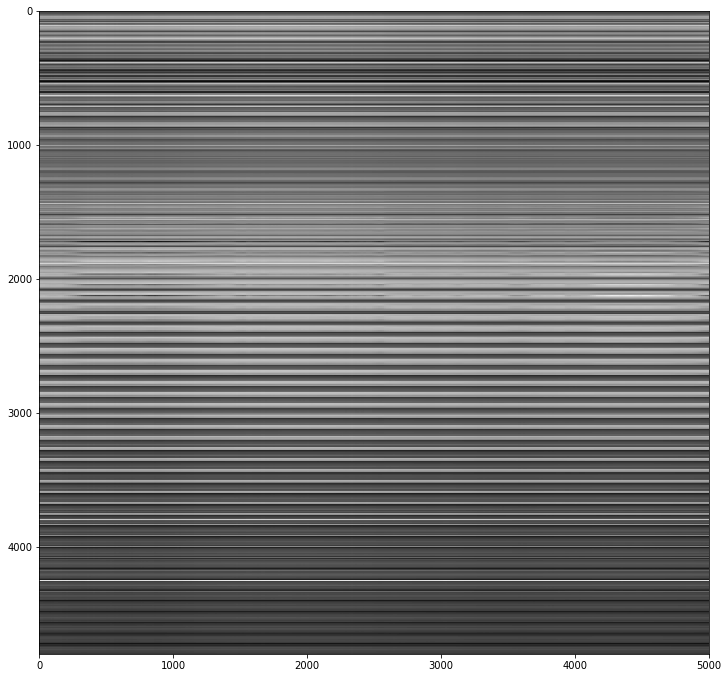

In [14]:
plt.figure(figsize=(12, 12))
plt.imshow(low_rank, cmap='gray')

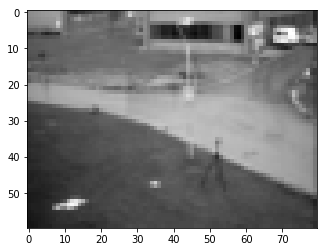

In [15]:
plt.imshow(np.reshape(low_rank[:,140], dims), cmap='gray');

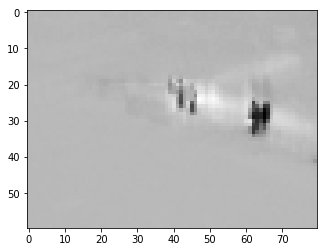

In [16]:
plt.imshow(np.reshape(M[:,550] - low_rank[:,550], dims), cmap='gray')

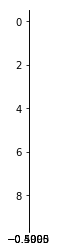

In [17]:
plt.imshow(np.reshape(M[:,140] - low_rank[:,140], dims)[50:150,100:270], cmap='gray');